In [200]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline

train = pd.read_csv('q3_train.csv')
test = pd.read_csv('q3_test.csv')
print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Populating the interactive namespace from numpy and matplotlib
Train shape :  (4209, 378)
Test shape :  (4209, 377)


## Data PreProcessing
Removed Outliers in Y, and dataset did not have any missing values

In [201]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


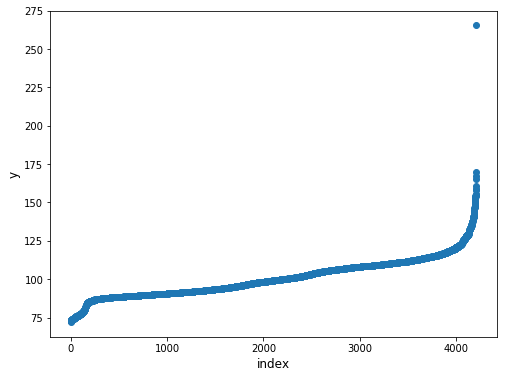

In [202]:
#some exploratory analysis on y
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

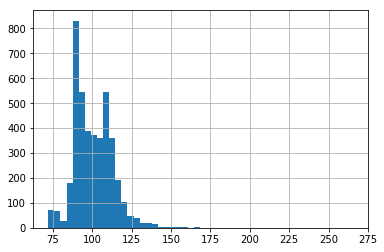

In [203]:
train['y'].hist(bins = 50)

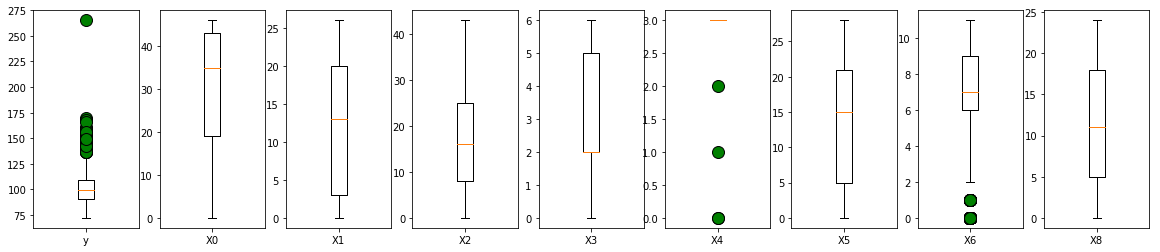

In [204]:
#we know that after from X10 onwards, all the variables are categorical so we test for outliers on y and X0 - 8
train_sample = train[['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

props = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
cols = train_sample.columns.values
num_cols = len(cols)
plt.subplots(num_cols,1, figsize = (20,4))
for i in range(num_cols):
    ax1 = plt.subplot(1,num_cols,i+1)
    plt.boxplot(train_sample[cols[i]],flierprops=props)
    ax1.set_xticklabels([cols[i]])

In [205]:
#check for missing values
train[train.isnull()] #no missing values!

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
#remove outliers in y
traindf = train
# Q1 = train['y'].quantile(0.25)
# Q3 = train['y'].quantile(0.75)
# iqr = Q3 - Q1
# train_25 = train[train['y'] > Q1 - 1.5*iqr]
# traindf = train_25[train_25['y'] < Q3 + 1.5*iqr]
# traindf['y'].hist(bins = 50)

In [207]:
traindf.shape

(4209, 378)

## Predictive Models

In [208]:
#split into train/test 
import statsmodels.api as sm
from patsy import dmatrices

y_train = pd.DataFrame(traindf.y, columns = ['y'])
X_train = traindf.drop(['ID', 'y'], axis = 1)

#test doesn't have a y variable - we have to predict it
X_test = test.drop(['ID'], axis = 1)

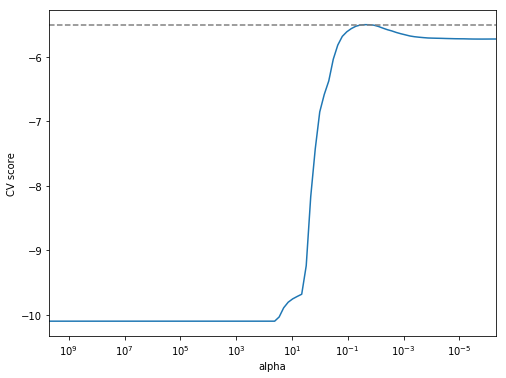

The best lambda is 0.02431300790032667


In [209]:
#Lasso
#optimize the alphas using cross validation
#trying range of alphas from λ=1010λ=1010  to λ=10−6

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

lasso = Lasso(random_state=0)
alphas =  10**np.linspace(10,-6,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_absolute_error')
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

best_lambda_lasso = alphas[scores.argmax()]
print ("The best lambda is", best_lambda_lasso)

In [210]:
#run lasso with best lambda
lasso = Lasso(alpha = 0.01675801325469417).fit(X_train, y_train)
lassopred = lasso.predict(X_test)

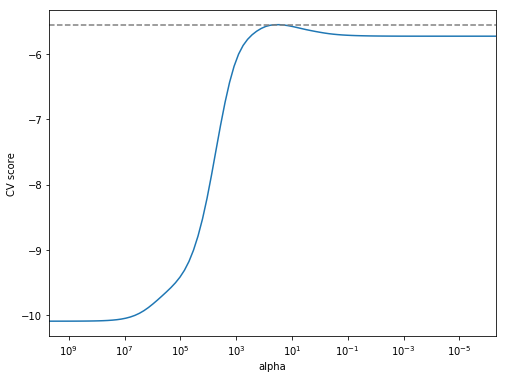

The best lambda is 28.611838296750985


In [211]:
#Ridge CV
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=0)
alphas =  10**np.linspace(10,-6,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_absolute_error')
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

best_lambda_ridge = alphas[scores.argmax()]
print ("The best lambda is", best_lambda_ridge)

In [212]:
ridge = Ridge(alpha = 19.72103029718824).fit(X_train, y_train)
ridgepred = ridge.predict(X_test)

In [213]:
#Multilayer Perceptron
#1 hidden layer
import sklearn.neural_network as nn
from sklearn.model_selection import (train_test_split,KFold, cross_val_score)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train, y=None)
# X_test_scaled = scaler.fit_transform(X_test, y=None)

mlp = nn.MLPRegressor(hidden_layer_sizes = (1,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                        random_state=42, batch_size=30, learning_rate_init = 0.005).fit(X_train, y_train)
mse = cross_val_score(mlp, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
mlppred = mlp.predict(X_test)

In [214]:
#average predictions of lassopred, ridgepred, and mlppred
lassoY = pd.DataFrame(lassopred)
ridgeY = pd.DataFrame(ridgepred)
mlpY = pd.DataFrame(mlppred)
yPreds = (lassoY + ridgeY + mlpY)/3
yPreds.to_csv("ypredictions.csv")